<h1 style="text-align: center;"><img class="responsive" style="float: left;" src="https://is1-ssl.mzstatic.com/image/thumb/Purple112/v4/b5/6e/20/b56e2053-ccd2-d63f-e0fb-a1bf3774eb0b/AppIcon-0-0-1x_U007emarketing-0-0-0-10-0-0-sRGB-0-0-0-GLES2_U002c0-512MB-85-220-0-0.png/230x0w.webp" alt="" width="143" height="143" /></h1>
<h1 style="text-align: center;"><img class="responsive" style="font-size: 14px; float: right;" src="https://i0.wp.com/mosefparis1.fr/wp-content/uploads/2022/10/cropped-image-1.png?fit=532%2C540&amp;ssl=1" alt="" width="163" height="165" /></h1>
<h1 style="text-align: center;"><span style="color: #000080; font-family: arial, helvetica, sans-serif;"><strong style="font-size: 24pt;">LCL Challenge</strong></span></h1>
<p style="text-align: center;"><span style="font-size: 14pt;">Scoring Immobilier: Syst&egrave;me Expert BEST&nbsp;IMMO</span></p>
<p style="text-align: center;"><span style="font-size: 10pt; font-family: verdana, geneva, sans-serif;">Lucie Gabagnou,&nbsp;Ghiles Idris,&nbsp;Armand L'Huillier,&nbsp;Yanis Rehoune</span></p>

Désormais, nos variables sont propres, et peuvent être directement utilisées dans la modélisation. 
Si ce n'est pas le cas, nous remettons la pipeline à disposition

### Installation de l'environnement de travail

#### Installation des packages

In [209]:
from scripts.modelisation import train_test_split,prepare_data_for_ml,fitting_model,gridsearchcv_for_model,evaluation,get_coeff_for_model,verif_nb_colonnes
import sklearn
import pickle
from sklearn.model_selection import  train_test_split
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
import xgboost  as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import warnings 
warnings.filterwarnings("ignore")


#### Importation des données

In [210]:
""" RAPPEL SUR LES VARIABLES SELECTIONNEES"""

col_selected=["g_quotite", "g_PCT_TEG_TAEG_CRI", "g_MOY_ANC_PROF_BRP", "g_MNT_TOT_ASSURANCE_CRI", "g_COUT_RACHAT_BRP", "g_BEST_APPORT_TX_BRP","TOP_NAT_FR_CRI","QUA_INT_MAX_BRP","QUA_INT_1_BRP",
        "IRPRO_USAGE_V12_MAX", "IRPAR_USAGE_V12_MAX","IND_PRIMO_ACCEDT_CRI","COD_TYPE_MARCHE_CRI","COD_SITU_LOGT_CRI", "COD_CPPOP_CRI","CODTYP_CRT_TRAVAIL_CRI" ]


In [211]:

x_base_train = pd.read_csv('x_train.csv').drop(columns="Unnamed: 0")
df_test = pd.read_csv('x_test.csv').drop(columns="Unnamed: 0")
x_oot = pd.read_csv('x_oot.csv') .drop(columns="Unnamed: 0")


In [212]:
x_base_train,y_base_train=prepare_data_for_ml(x_base_train,col_selected)
df_test,y_df_test=prepare_data_for_ml(df_test,col_selected)
x_oot,y_oot=prepare_data_for_ml(x_oot,col_selected)


In [213]:
def verif_nb_colonnes(x_train:pd.DataFrame,x_other:pd.DataFrame)-> pd.DataFrame : 
    """ Retourne dataframe disposant des mêmes colonnes que les features utilisés pour l'entraînement du modèle (x_train)
    Arguments: 
    - x_train: features finaux
    - x_other: dataframe à check et éventuellement corriger si colonnes différentes
    """

    # Get missing columns in the training test
    missing_cols = set( x_train.columns ) - set( x_other.columns )
    # Add a missing column in test set with default value equal to 0
    for c in missing_cols:
        x_other[c] = 0
    # Ensure the order of column in the test set is in the same order than in train set
    x_other = x_other[x_train.columns]
    return x_other

In [214]:
""" VERIFICATION MEME FEATURES POUR ML"""
x_oot=verif_nb_colonnes(x_base_train,x_oot)
df_test=verif_nb_colonnes(x_base_train,df_test)


In [215]:
x_base_train

,g_quotite_grp_2,g_quotite_grp_3,g_quotite_grp_4,g_PCT_TEG_TAEG_CRI_grp_2,g_PCT_TEG_TAEG_CRI_grp_3,g_PCT_TEG_TAEG_CRI_grp_4,g_MOY_ANC_PROF_BRP_grp_2,g_MOY_ANC_PROF_BRP_grp_3,g_MOY_ANC_PROF_BRP_nan,g_MNT_TOT_ASSURANCE_CRI_grp_2,...,IRPAR_USAGE_V12_MAX_1,IRPAR_USAGE_V12_MAX_2,IND_PRIMO_ACCEDT_CRI_1,COD_TYPE_MARCHE_CRI_1,COD_SITU_LOGT_CRI_2,COD_SITU_LOGT_CRI_3,COD_CPPOP_CRI_1,COD_CPPOP_CRI_2,CODTYP_CRT_TRAVAIL_CRI_1,CODTYP_CRT_TRAVAIL_CRI_2
0,0,1,0,1,0,0,0,1,0,0,...,0,1,1,0,0,1,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68211,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
68212,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
68213,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
68214,0,0,0,0,1,0,1,0,0,0,...,0,1,1,0,0,1,0,0,0,0


In [216]:

display(x_base_train.head(10))
print("Vérification du nombre de variables (35 colonnes):",x_base_train.shape)

,g_quotite_grp_2,g_quotite_grp_3,g_quotite_grp_4,g_PCT_TEG_TAEG_CRI_grp_2,g_PCT_TEG_TAEG_CRI_grp_3,g_PCT_TEG_TAEG_CRI_grp_4,g_MOY_ANC_PROF_BRP_grp_2,g_MOY_ANC_PROF_BRP_grp_3,g_MOY_ANC_PROF_BRP_nan,g_MNT_TOT_ASSURANCE_CRI_grp_2,...,IRPAR_USAGE_V12_MAX_1,IRPAR_USAGE_V12_MAX_2,IND_PRIMO_ACCEDT_CRI_1,COD_TYPE_MARCHE_CRI_1,COD_SITU_LOGT_CRI_2,COD_SITU_LOGT_CRI_3,COD_CPPOP_CRI_1,COD_CPPOP_CRI_2,CODTYP_CRT_TRAVAIL_CRI_1,CODTYP_CRT_TRAVAIL_CRI_2
0,0,1,0,1,0,0,0,1,0,0,...,0,1,1,0,0,1,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
5,0,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,1,0,0,0
6,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
7,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
8,1,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
9,0,1,0,0,0,1,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0


Vérification du nombre de variables (35 colonnes): (68216, 35)


In [217]:
x_train, x_test, y_train, y_test=train_test_split(x_base_train,y_base_train,stratify=y_base_train)

### Régression logistique

#### Entraînement et performance sur l'échantillon train/validation

In [218]:
logistic_model=LogisticRegression()
grid_logistic = {'penalty' : ['elasticnet' ] ,
'C' : [0.01, 0.1 , 10] ,
'solver' :  ['saga'], 
'l1_ratio' : [ 0.01 , 0.1],
'class_weight' : [ {1 : class_} for class_ in [1,2,5]  ] }

""" GRIDSEARCH POUR LOGISTIQUE"""

params=gridsearchcv_for_model(logistic_model,x_train,y_train,grid_logistic,train_mod_with_best_params=False)
print("Best parameters:",params)


Best parameters: {'C': 10, 'class_weight': {1: 5}, 'l1_ratio': 0.01, 'penalty': 'elasticnet', 'solver': 'saga'}


[Explication pourquoi on choisit pas les memes sagas...]

In [219]:
""" PARAMETRES FINALEMENT RETENUS:"""
params_for_logistic={'random_state':42 ,
'fit_intercept':True, 
'class_weight':'{1: 2}', 
'C':0.1,
'l1_ratio':0, 
'penalty':'l2', 
'solver':'lbfgs'}


In [220]:
logistic_final=LogisticRegression(**params_for_logistic)
logistic_final=fitting_model(logistic_final,x_train,y_train)

array([[50833,     0],
       [  329,     0]])

array([[16944,     0],
       [  110,     0]])

AUC TRAIN : 0.75
AUC TEST : 0.71


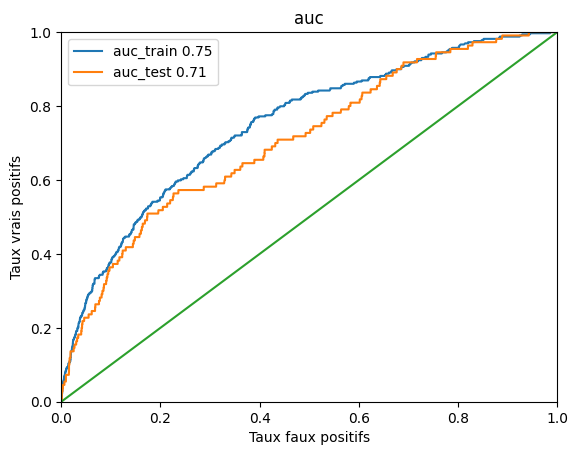

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

In [221]:

evaluation(logistic_final,x_train,x_test,y_train,y_test)

[JUSTIFIER LA MATRICE DE CONFUSION : SEUIL DE 0.5 POUR NOUS D' OU AUCUN DEFAUT DETECTE
]

### Performance du modèle sur les autres échantillons: 

In [222]:
""" RAPPEL MODELE FINAL"""
params_for_logistic={'random_state':42 ,
'fit_intercept':True, 
'class_weight':'{1: 2}', 
'C':0.1,
'l1_ratio':0, 
'penalty':'l2', 
'solver':'lbfgs'}
logistic_final=LogisticRegression(**params_for_logistic)
final_model_logistic=fitting_model(logistic_final,x_train,y_train)

In [223]:
print("Performance du modèle sur la base OOT")
y_oot_pred = final_model_logistic.predict_proba(x_oot) 
y_oot_pred = pd.DataFrame(y_oot_pred).iloc[: , 1]
score_auc_oot = sklearn.metrics.roc_auc_score(y_oot, y_oot_pred)
print('AUC base oot :' ,score_auc_oot.round(2))

print("Performance du modèle sur la base test")
y_test_predict = final_model_logistic.predict_proba(df_test) 
y_test_predict = pd.DataFrame(y_test_predict).iloc[: , 1]
score_auc_test = sklearn.metrics.roc_auc_score(y_test, y_test_predict)
print('AUC base test :' ,score_auc_test.round(2))

Performance du modèle sur la base OOT
AUC base oot : 0.68
Performance du modèle sur la base test
AUC base test : 0.51


### Modélisation concurrente

In [224]:
from collections import Counter
counter = Counter(y_train)
estimate = counter[0] / counter[1] 
print('Estimate: %.3f' % estimate)

Estimate: 154.508


In [186]:
###from sklearn.model_selection import StratifiedKFold

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold,GridSearchCV
kfold=StratifiedKFold(n_splits=5,shuffle=True)

import numpy as np
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train.values.reshape(-1)
)

import xgboost as xgb
boost=xgb.XGBClassifier(objective="binary:logistic")

param_grid_xgb = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [estimate],
    "subsample": [0 ,0.8],
    "colsample_bytree": [0.5],
    "n_jobs":[-1],
    
}

gridsearchcv_for_model(boost,x_base_train,y_base_train,param_grid_xgb,False)

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_jobs': -1,
 'reg_lambda': 0,
 'scale_pos_weight': 154.50759878419453,
 'subsample': 0.8}

In [151]:
params_for_xgb={'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 3,
 'reg_lambda': 10,
 'scale_pos_weight': 154.50759878419453,
 'subsample': 0.8}



array([[49258, 18519],
       [  136,   303]])

array([[12731,  4213],
       [   52,    58]])

AUC TRAIN : 0.78
AUC TEST : 0.71


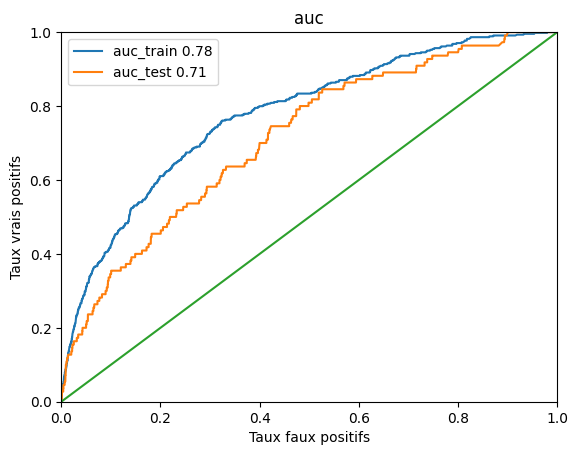

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

In [227]:
xgb_model=xgb.XGBClassifier(**params_for_xgb)
xgboost=fitting_model(xgb_model,x_base_train,y_base_train)
evaluation(xgboost, x_base_train,df_test,y_base_train,y_df_test)

In [155]:
""" Exportation du modèle """
#pickle.dump(xgboost, open('xgboost.pkl', 'wb'))

In [228]:
print("Performance du modèle sur la base OOT")
y_oot_pred = xgboost.predict_proba(x_oot) 
y_oot_pred = pd.DataFrame(y_oot_pred).iloc[: , 1]
score_auc_oot = sklearn.metrics.roc_auc_score(y_oot, y_oot_pred)
print('AUC base oot :' ,score_auc_oot.round(2))



Performance du modèle sur la base OOT
AUC base oot : 0.68


In [ ]:
shap.dependence_plot(“volatile acidity”, shap_values, X_train)

In [229]:
import shap

shap.initjs()
explain_xgb= shap.TreeExplainer(xgboost)
shap_xgb = explain_xgb.shap_values(x_base_train)
shap.force_plot(explain_xgb.expected_value, shap_xgb[2, :], x_base_train.iloc[2, :])

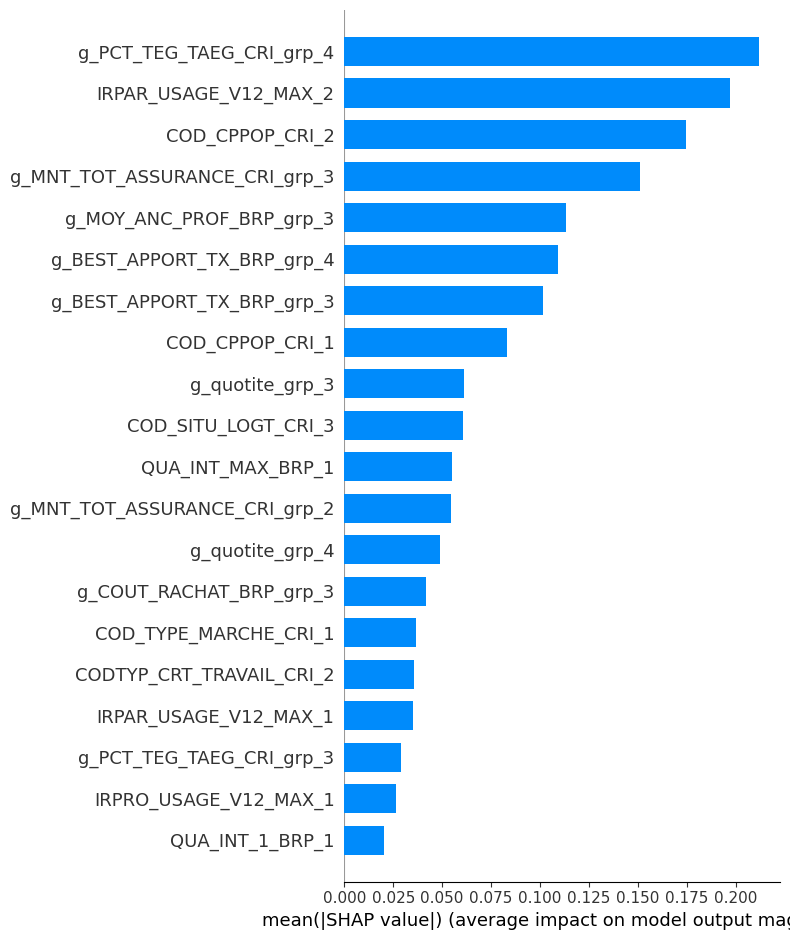

In [230]:
shap.summary_plot(shap_xgb, x_base_train,plot_type="bar")

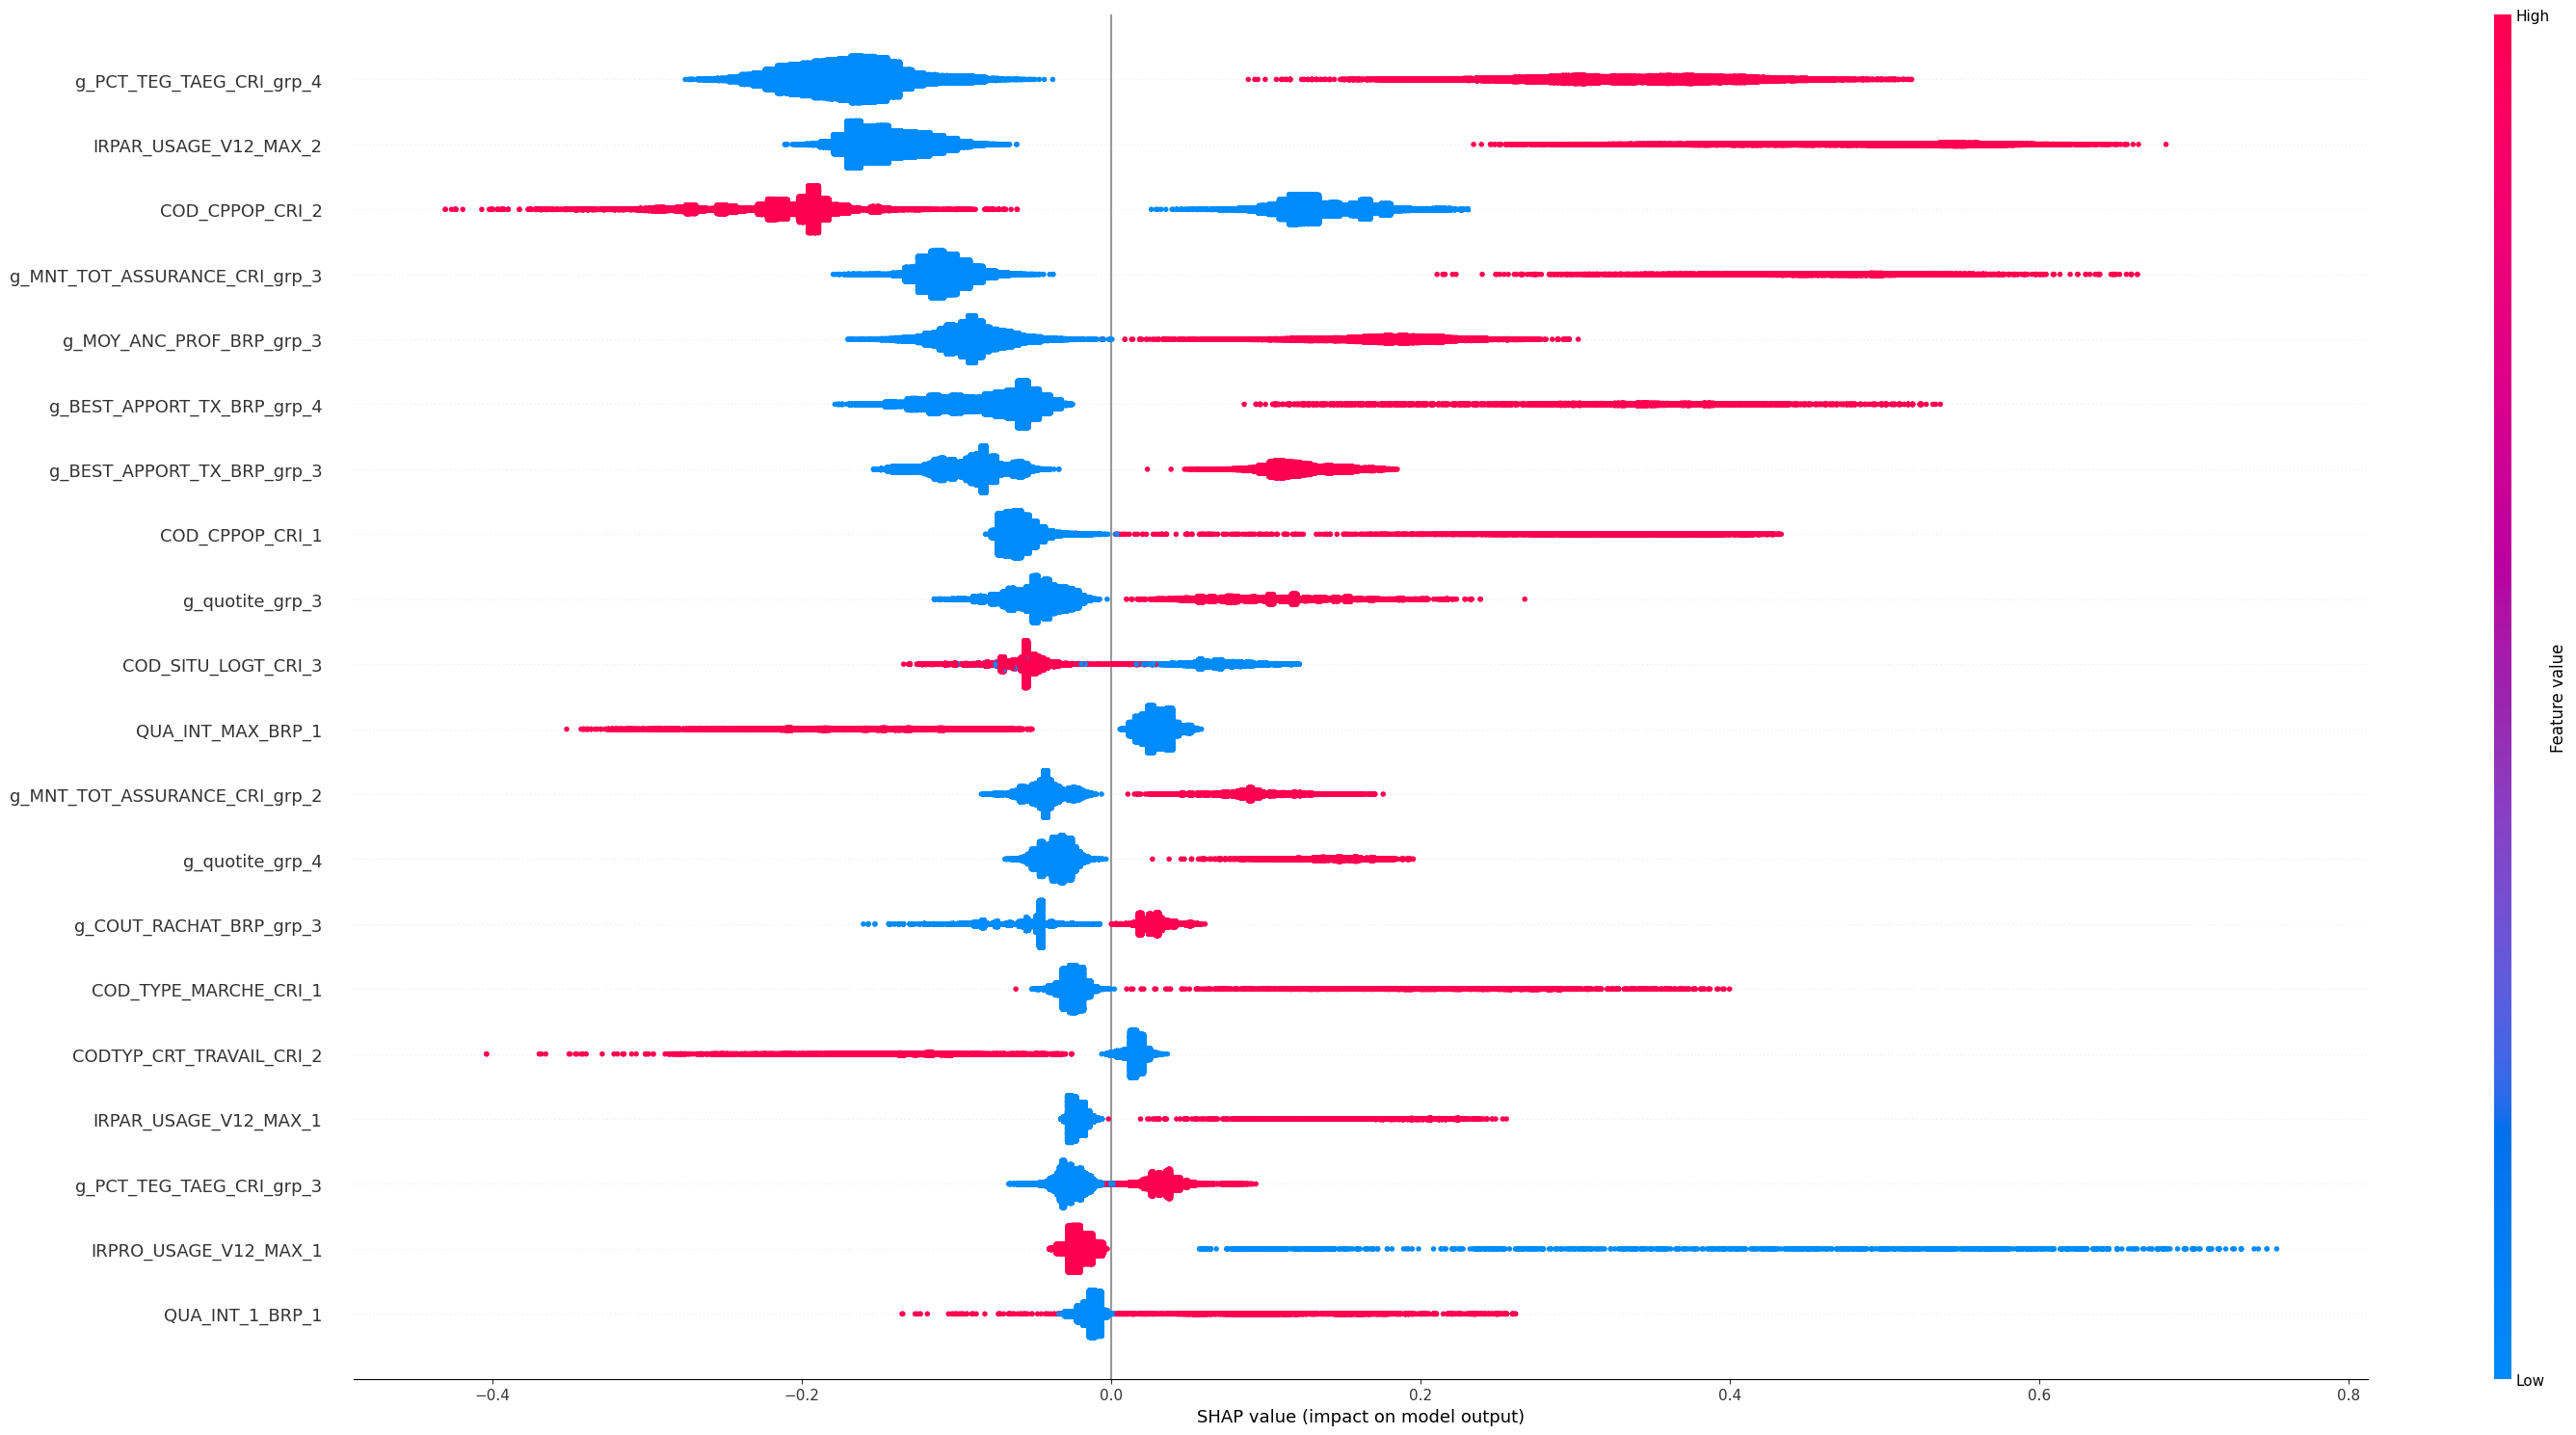

In [231]:

plt_shap = shap.summary_plot(shap_xgb, #Use Shap values array
                             features=x_base_train, # Use training set features
                             feature_names=x_base_train.columns, #Use column names
                             show=False, #Set to false to output to folder
                             plot_size=(30,15)) # Change plot size
